# Waste to Energy: Biomass production forecast
-------------
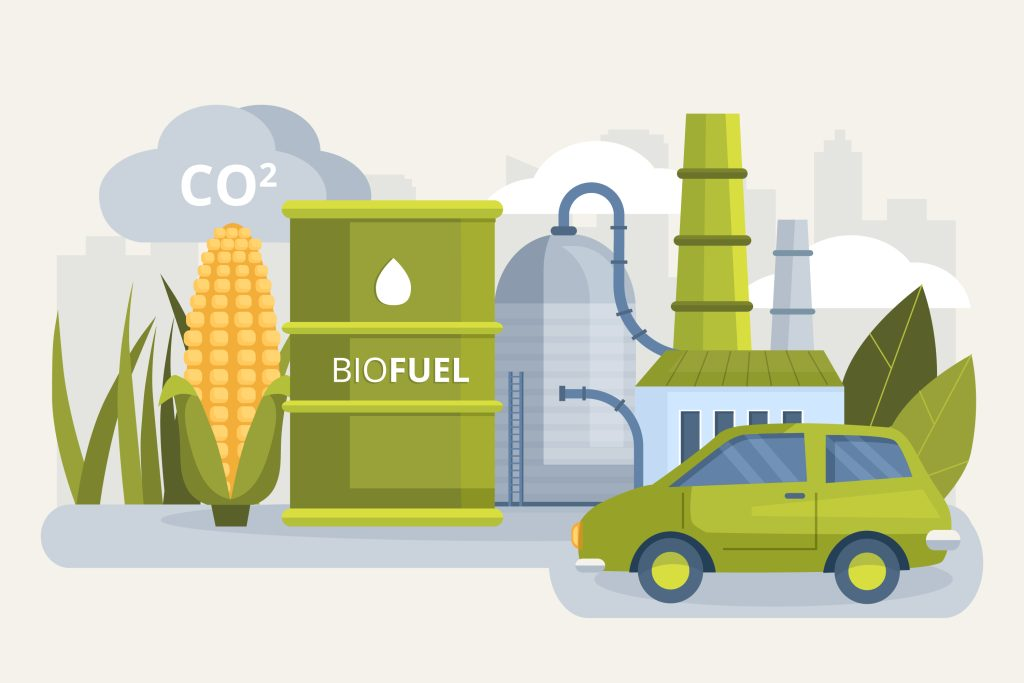

## Ingestão de dados e bibliotecas

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import utils
import joblib

biomass = pd.read_csv('dataset/Biomass_History.csv')
utils.standardize_column_names(biomass)
biomass = biomass.rename(columns={'latitude': 'lat', 'longitude': 'lon'})

In [2]:
biomass.duplicated().sum()

0

In [2]:
biomass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2418 non-null   int64  
 1   lat     2418 non-null   float64
 2   lon     2418 non-null   float64
 3   2010    2418 non-null   float64
 4   2011    2418 non-null   float64
 5   2012    2418 non-null   float64
 6   2013    2418 non-null   float64
 7   2014    2418 non-null   float64
 8   2015    2418 non-null   float64
 9   2016    2418 non-null   float64
 10  2017    2418 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 207.9 KB


Não há nenhum valor faltante, temos somente colunas numéricas

## Descrição dos dados

Para efetuar a previsão de valores anuais de biomassa, irei utilizar um *dataset* que possui, a princípio, as seguintes *features*:

- **index**: índice do local de colheita
- **lat**: latitude do local de colheita
- **lon**: longitude do local de colheita
- **2010**: valor de biomassa no ano de 2010
- **2011**: valor de biomassa no ano de 2011
- **2012**: valor de biomassa no ano de 2012
- **2013**: valor de biomassa no ano de 2013
- **2014**: valor de biomassa no ano de 2014
- **2015**: valor de biomassa no ano de 2015
- **2016**: valor de biomassa no ano de 2016
- **2017**: valor de biomassa no ano de 2017

O objetivo principal é prever os valores de biomassa para os anos 2018 e 2019 utilizando dessa base de dados.

In [47]:
biomass.head()

index       lat       lon       2010       2011       2012       2013  \
0      0  24.66818  71.33144   8.475744   8.868568   9.202181   6.023070   
1      1  24.66818  71.41106  24.029778  28.551348  25.866415  21.634459   
2      2  24.66818  71.49069  44.831635  66.111168  56.982258  53.003735   
3      3  24.66818  71.57031  59.974419  80.821304  78.956543  63.160561   
4      4  24.66818  71.64994  14.653370  19.327524  21.928144  17.899586   

        2014       2015       2016        2017  
0  10.788374   6.647325   7.387925    5.180296  
1  34.419411  27.361908  40.431847   42.126945  
2  70.917908  42.517117  59.181629   73.203232  
3  93.513924  70.203171  74.536720  101.067352  
4  19.534035  19.165791  16.531315   26.086885

In [4]:
biomass.describe()

index          lat          lon         2010         2011  \
count  2418.000000  2418.000000  2418.000000  2418.000000  2418.000000   
mean   1208.500000    22.506537    71.826215   144.401424   150.860247   
std     698.160798     1.034936     1.389804   146.506351   142.264612   
min       0.000000    20.154560    68.624190     0.000167     0.000433   
25%     604.250000    21.685970    70.774060    23.449163    25.576084   
50%    1208.500000    22.491970    71.888820   112.298855   126.291077   
75%    1812.750000    23.297970    73.003570   207.689327   226.197079   
max    2417.000000    24.668180    74.436820   883.691711   771.061646   

              2012         2013         2014         2015         2016  \
count  2418.000000  2418.000000  2418.000000  2418.000000  2418.000000   
mean    109.468899   161.886430   157.954024   132.898633   113.089323   
std     110.249714   180.337708   139.870466   129.689111   102.092570   
min       0.000290     0.000532     0.000155     0.000072     0.000151   
25%      22.711070    27.044554    31.514698    22.732275    22.658495   
50%      82.271317   117.662296   136.859337   106.789989    91.721931   
75%     163.512547   222.835739   241.965115   196.102222   177.136295   
max     871.800415  1232.853760   871.800415   771.061646   514.148987   

              2017  
count  2418.000000  
mean    159.163367  
std     158.993069  
min       0.000191  
25%      26.064368  
50%     120.519817  
75%     231.067348  
max     883.691711

- A média do ano de 2013 é bem alta, possivelmente influenciada por valores grandes, como o máximo de 1232.
- Os máximos de cada ano são bem distantes da média e da mediana, o que indica a presença de valores bem discrepantes.

## Exploratory Analysis


Podemos observar uma pequena tendência, talvez uma sazonalidade ou um ciclo. Temos poucos anos para saber ao certo.

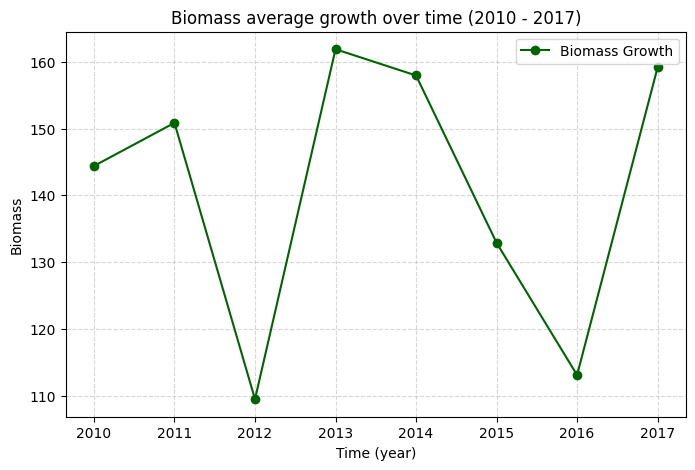

In [5]:
biomass_growth = biomass.iloc[:, 3:].mean()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the biomass growth curve
ax.plot(biomass_growth.index, biomass_growth.values, marker='o', linestyle='-', color='darkgreen')

# Set the labels and title
ax.set_xlabel('Time (year)')
ax.set_ylabel('Biomass')
ax.set_title('Biomass average growth over time (2010 - 2017)')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Add a legend
ax.legend(['Biomass Growth'])
plt.savefig('images/biomass_growth_plot.png', dpi=200)
# Show the plot
plt.show()


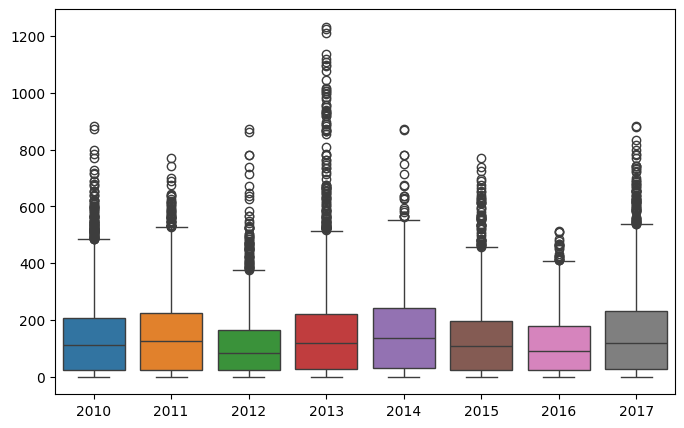

In [6]:
# boxplot of the years
biomass_growth = biomass.iloc[:, 3:]
biomass_growth.columns = biomass_growth.columns.astype(int)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Create a boxplot
sns.boxplot(data=biomass_growth, ax=ax)

plt.show()

Anos com medianas similares mas com muitos valores discrepantes.

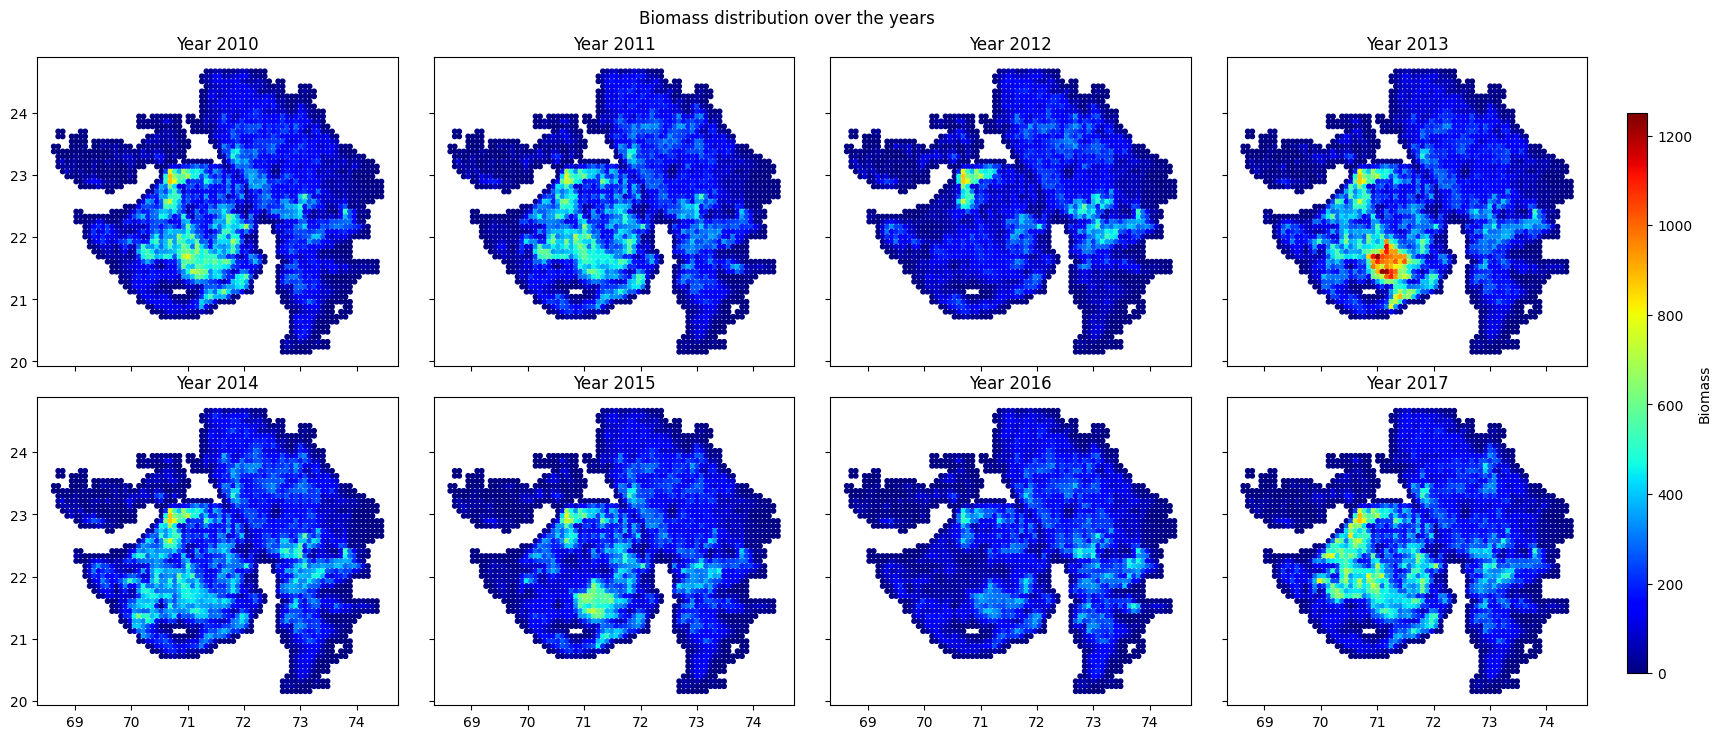

In [8]:
# Set the figure size
fig, axs = plt.subplots(2, 4, figsize=(20, 8), sharex=True, sharey=True)
fig.suptitle('Biomass distribution over the years')
# Iterate over each year
for i, year in enumerate(range(2010, 2018)):
    # Get the corresponding column name
    column_name = str(year)
    
    # Get the subplot axes
    ax = axs[i // 4, i % 4]
    
    # Plot the map
    ax.scatter(biomass['lon'], biomass['lat'], c=biomass[column_name], cmap='jet', vmax=1250, vmin=0, s=10)
    
    # Set the labels and title
    ax.set_title(f'Year {year}')
    
    # Save the plot
    #plt.savefig(f'images/biomass_distribution_plot_{year}.png', dpi=200)

plt.subplots_adjust(wspace=0.1, hspace=0.1, top=0.92)

# Add a colorbar for all plots combined
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar = fig.colorbar(ax.collections[0], cax=cbar_ax)
cbar.set_label('Biomass')

# Show the plots
plt.show()

Na imagem acima é possível observar que claramente o ano de 2013 é o que possui os maiores valores.

In [9]:
melted = pd.melt(biomass, id_vars=['index', 'lat', 'lon'], value_vars=biomass.iloc[:, 3:].columns)
melted.head()
fig = px.scatter(melted, x='lat', y='lon', color='value', title='Biomass production change over the years (2010-2017)', animation_frame='variable',
           labels={'variable': 'Year', 'value': 'Biomass '}, template='plotly_white', width=1000, height=700, color_continuous_scale=['darkblue', 'blue','cyan', 'lightgreen', 'yellow', 'orange', 'red', 'darkred'],
           range_color=[100, 1200])

fig.update_traces(marker=dict(size=7))  # Decrease the size of the markers

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1600
fig.show()

## **Novas features**

Pela escassez de atributos, é necessário buscar dados relevantes na Internet para ajudar a compor um melhor dataset.

In [11]:
from feature_engineering import (elevation, district, 
                                 rainfall, fe_utils, cropland)
import importlib
import geopandas as gpd
years_columns = biomass.columns[3:]

### Grid blocks

O problema é descrito como blocos de tamanhos iguais que compõem o estado de Gujarat. Para facilitar a correspondência entre os dados novos e as instâncias do dataset, vou construir blocos de tamanhos iguais em que cada um corresponde a uma instância dos dados.

In [12]:
importlib.reload(fe_utils)
biomass_gpd = fe_utils.set_grid_blocks(biomass, offset=0.05)
biomass_gpd = gpd.GeoDataFrame(biomass_gpd, geometry='block')
biomass_gpd = biomass_gpd.set_crs('EPSG:4326')
biomass_gpd.head()


index       lat       lon       2010       2011       2012       2013  \
0      0  24.66818  71.33144   8.475744   8.868568   9.202181   6.023070   
1      1  24.66818  71.41106  24.029778  28.551348  25.866415  21.634459   
2      2  24.66818  71.49069  44.831635  66.111168  56.982258  53.003735   
3      3  24.66818  71.57031  59.974419  80.821304  78.956543  63.160561   
4      4  24.66818  71.64994  14.653370  19.327524  21.928144  17.899586   

        2014       2015       2016        2017  \
0  10.788374   6.647325   7.387925    5.180296   
1  34.419411  27.361908  40.431847   42.126945   
2  70.917908  42.517117  59.181629   73.203232   
3  93.513924  70.203171  74.536720  101.067352   
4  19.534035  19.165791  16.531315   26.086885   

                                               block  
0  POLYGON ((71.28144 24.71818, 71.38144 24.71818...  
1  POLYGON ((71.36106 24.71818, 71.46106 24.71818...  
2  POLYGON ((71.44069 24.71818, 71.54069 24.71818...  
3  POLYGON ((71.52031 24.71818, 71.62031 24.71818...  
4  POLYGON ((71.59994 24.71818, 71.69994 24.71818...

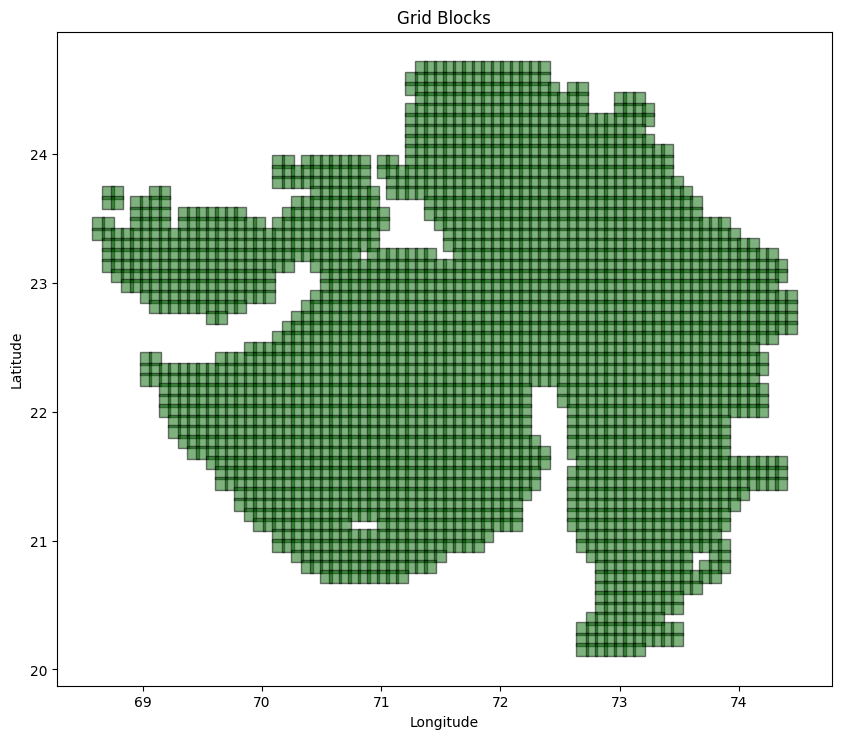

In [13]:
# plot the grid blocks
fig, ax = plt.subplots(figsize=(10, 10))
biomass_gpd.plot(ax=ax, edgecolor='black', alpha=0.5, color='darkgreen')

# Set the title
ax.set_title('Grid Blocks')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

### Distritos

In [14]:
importlib.reload(district)
biomass_gpd = district.add_district_feature(biomass_gpd)

In [15]:
biomass_gpd.distname.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2418 entries, 0 to 2417
Series name: distname
Non-Null Count  Dtype 
--------------  ----- 
2296 non-null   object
dtypes: object(1)
memory usage: 19.0+ KB


Existem alguns valores nulos, vamos investigar.

In [16]:
biomass_gpd[biomass_gpd.distname.isna()][['distname', 'lat', 'lon']]

distname       lat       lon
574       NaN  23.29797  68.70381
656       NaN  23.21737  70.29631
657       NaN  23.21737  70.37594
662       NaN  23.21737  70.77406
704       NaN  23.13677  68.70381
...       ...       ...       ...
2381      NaN  20.39636  72.76469
2389      NaN  20.31576  72.68507
2390      NaN  20.31576  72.76469
2400      NaN  20.23516  72.68507
2411      NaN  20.15456  72.68507

[122 rows x 3 columns]

Os dados nulos são os que não foram possíveis efetuar um join com os polígonos dos distritos, o que leva a acreditar que são pontos fora da Índia. 
Colocando alguns no Google Maps é possível verificar que **os pontos estão no mar**. Portanto, eles serão imputados com a categoria 'Sea'.

In [ ]:
biomass_gpd['distname'] = biomass_gpd['distname'].fillna('Sea')

### Elevação

Informações de topologia podem ser fatores significativos na produção de biomassa

In [17]:
importlib.reload(elevation)
biomass_gpd = elevation.add_elevation_features(biomass_gpd)

Os dados estão em formatos *cross-sectional*, que é um formato em que os dados não estão distribuídos ao longo do tempo mas sim representam somente um ponto no tempo, i.e. é uma "fotografia" de um momento. Neste caso os dados precisam ser transformados de cross-sectional para longitudinal para que seja possível utilizar o tempo como uma variável e efetuar uma validação mais inteligente.

In [18]:
# convert the biomass wide df to a time-series long df with columns 'year', 'biomass', 'elevation', 'district', 'lat', and 'longitude'
biomass_long = pd.melt(biomass_gpd, id_vars=set(biomass_gpd.columns) - set(biomass_gpd.columns[3:11]), value_vars=biomass_gpd.columns[3:11], var_name='year', value_name='biomass')
biomass_long['year'] = biomass_long['year'].astype(int)

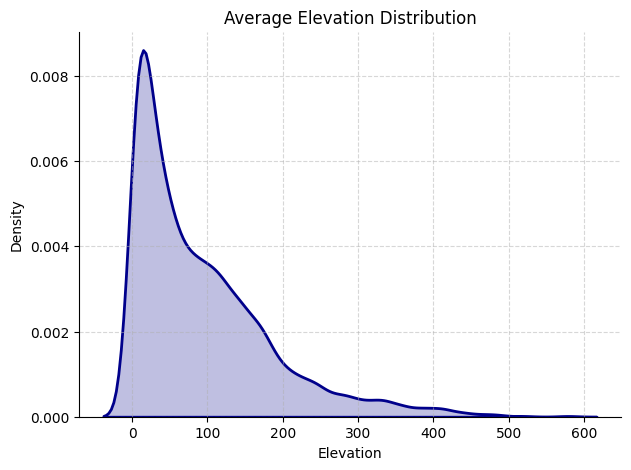

In [ ]:
# Set the figure size
plt.figure(figsize=(7, 5))

# Plot the distribution using KDE
sns.kdeplot(biomass_long['block_avg_elevation'], color='darkblue', linewidth=2, fill=True)

# Set the labels and title
plt.xlabel('Elevation')
plt.ylabel('Density')
plt.title('Average Elevation Distribution')
# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Remove the top and right spines
sns.despine()

# Save the plot
plt.savefig('images/elevation_distribution_kde.png', dpi=200)

# Show the plot
plt.show()

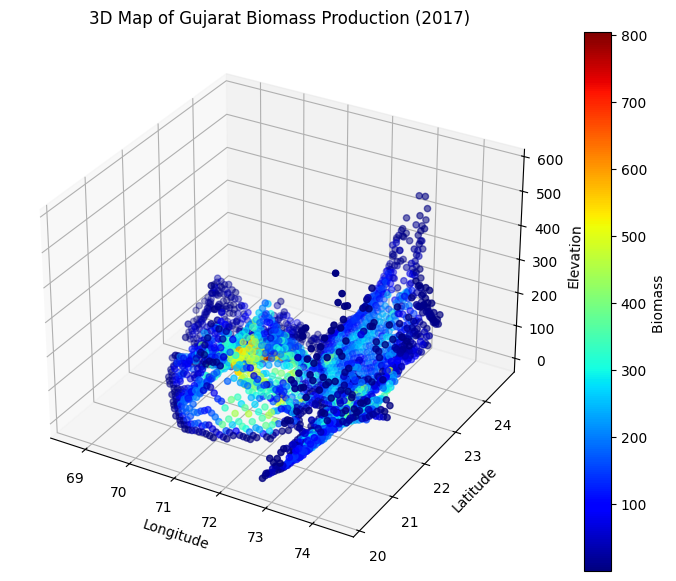

In [ ]:
# Create a 3D plot
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

latlon_grouped = biomass_long.groupby(['lat', 'lon'])[['biomass', 'block_avg_elevation']].mean().reset_index()

# Plot points
scatter = ax.scatter(latlon_grouped['lon'], latlon_grouped['lat'], latlon_grouped['block_avg_elevation'], c=latlon_grouped['biomass'], marker='o', cmap='jet')

# Plot surfaces
#ax.plot_trisurf(longitudes, lats, elevation, cmap='viridis', edgecolor='none')

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')

# Add a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Biomass ')

# Set the title
plt.title('3D Map of Gujarat Biomass Production (2017)')

# Show the plot
plt.show()


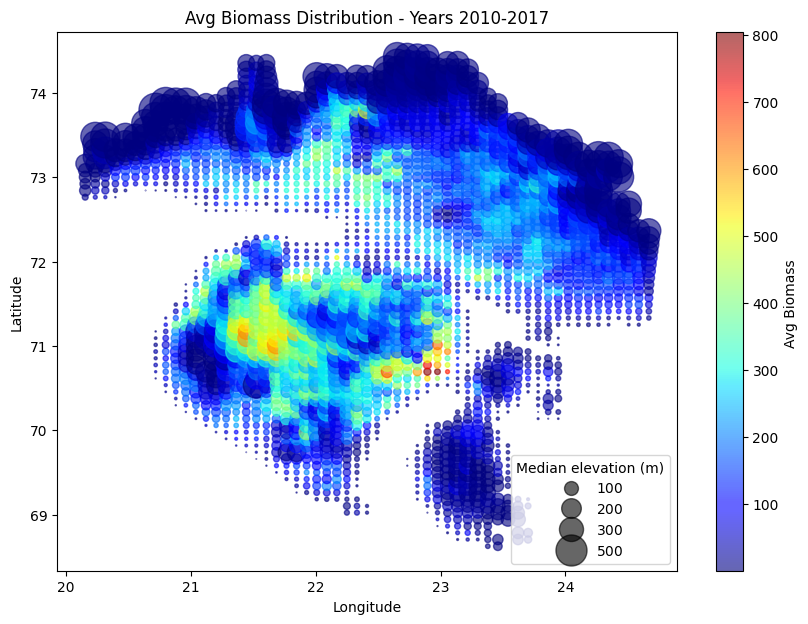

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the map
scatter = plt.scatter(latlon_grouped['lat'], latlon_grouped['lon'], s=latlon_grouped['block_avg_elevation'], c=latlon_grouped['biomass'], cmap='jet', alpha=.6)

# Set the labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Avg Biomass Distribution - Years 2010-2017')

# Add a colorbar
cbar = plt.colorbar(scatter, label='Avg Biomass ')
# Add a legend for the size of the marker
legend = plt.legend(*scatter.legend_elements(prop='sizes', num=[100, 200, 300, 500, 700]), title='Median elevation (m)', loc='lower right')
plt.setp(legend.get_title(), fontsize='medium')

plt.savefig('images/avg_biomass_distribution_map.png', dpi=200)
# Show the plot
plt.show()


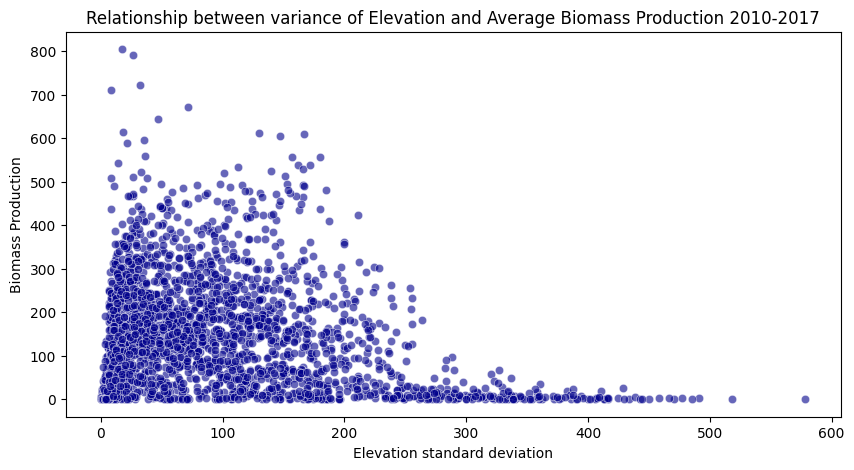

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the relationship between elevation and biomass production
sns.scatterplot(x=latlon_grouped['block_avg_elevation'], y=latlon_grouped['biomass'], data=biomass_long, color='darkblue', alpha=0.6)

# Set the labels and title
plt.xlabel('Elevation standard deviation')
plt.ylabel('Biomass Production')
plt.title('Relationship between variance of Elevation and Average Biomass Production 2010-2017')

# Show the plot
plt.show()


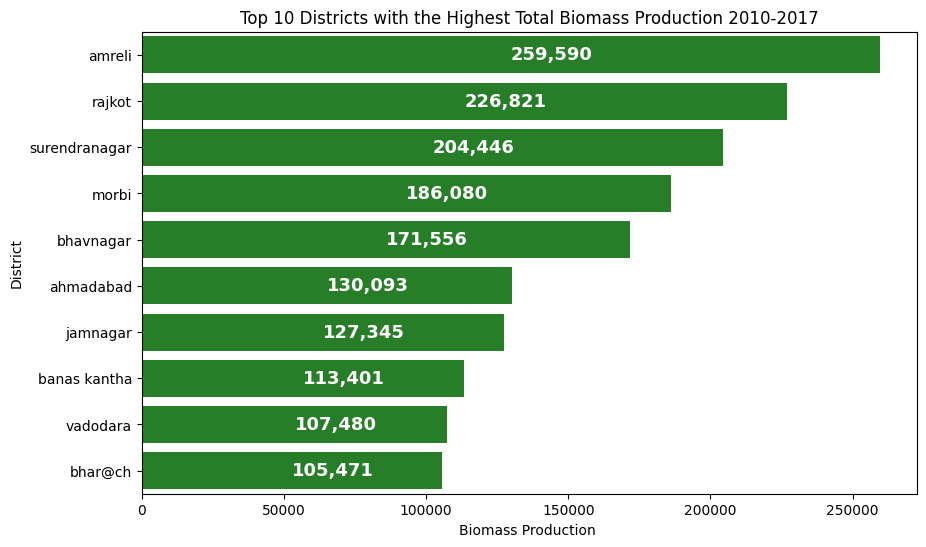

In [19]:
# plot the top 10 districts with the highest biomass production 2010-2017
top_10_districts = biomass_long.groupby('distname')['biomass'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.barplot(x=top_10_districts.values, y=top_10_districts.index, color='green', alpha=0.9)
# add the numbers on the bars
for i, v in enumerate(top_10_districts.values):
    plt.text((v//2), i, f'{v:,.0f}', va='center', color='white', fontweight='bold', fontdict={'fontsize': 13})

plt.xlabel('Biomass Production ')
plt.ylabel('District')
plt.title('Top 10 Districts with the Highest Total Biomass Production 2010-2017')
plt.show()

### Cropland

Com os blocos em mãos, é interessante obter dados de frações de terras agrícolas para cada bloco para saber o quanto daquele bloco é composto por terras agrícolas. Além disso pode ser interessante obter o quanto de porções foram ganhas ou perdidas durante o tempo.

In [20]:
importlib.reload(cropland)

<module 'feature_engineering.cropland' from 'c:\\Users\\mathe\\Desktop\\projetos_ds\\shell_hackathon\\feature_engineering\\cropland.py'>

In [21]:
biomass_long = cropland.add_cropland_feature(biomass_long)

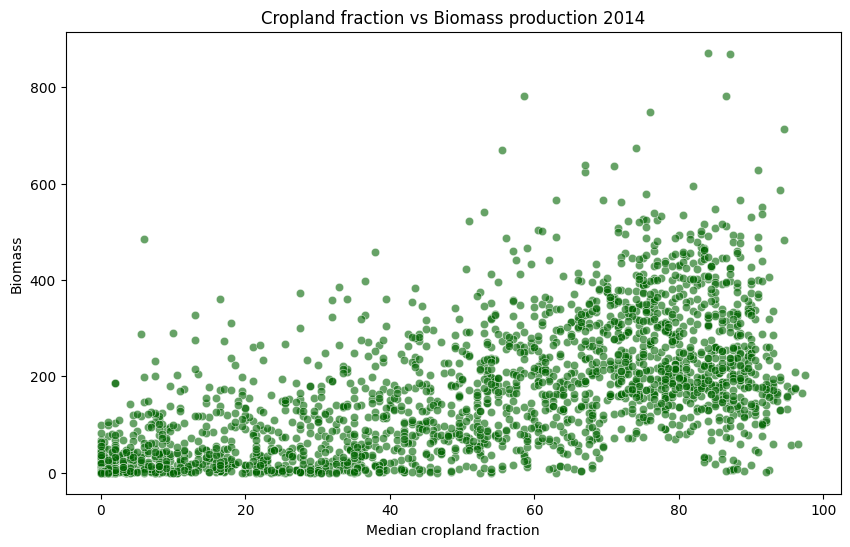

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_cropland', y='biomass', data=biomass_long.query('year == 2014'), color='darkgreen', alpha=0.6)
plt.xlabel('Median cropland fraction')
plt.ylabel('Biomass')
plt.title('Cropland fraction vs Biomass production 2014')
plt.show()


Aqui, é possível ver que há uma pequena relação positiva entre a porção de terras agrícolas (0-100%) e a biomassa.

### Chuvas

In [128]:
import importlib
importlib.reload(rainfall)

<module 'feature_engineering.rainfall' from 'c:\\Users\\mathe\\Desktop\\projetos_ds\\shell_hackathon\\feature_engineering\\rainfall.py'>

In [129]:
biomass_long = rainfall.add_rainfall_feature(biomass_long, years=biomass_long.year.unique(), forecast_horizon=0)

In [130]:
biomass_long

biomass       lon              distname  \
0       8.475744  71.33144                 jalor   
1      24.029778  71.41106                 jalor   
2      44.831635  71.49069          banas kantha   
3      59.974419  71.57031          banas kantha   
4      14.653370  71.64994                 jalor   
...          ...       ...                   ...   
19339   5.321604  72.84432               palghar   
19340   0.120626  72.92394               palghar   
19341   0.038879  73.00357  dadra & nagar haveli   
19342   1.304297  73.08319  dadra & nagar haveli   
19343   0.226953  73.16282  dadra & nagar haveli   

                                                   block  block_avg_elevation  \
0      POLYGON ((71.28144 24.71818, 71.38144 24.71818...                 9.80   
1      POLYGON ((71.36106 24.71818, 71.46106 24.71818...                15.80   
2      POLYGON ((71.44069 24.71818, 71.54069 24.71818...                23.00   
3      POLYGON ((71.52031 24.71818, 71.62031 24.71818...                31.85   
4      POLYGON ((71.59994 24.71818, 71.69994 24.71818...                41.70   
...                                                  ...                  ...   
19339  POLYGON ((72.79432 20.20456, 72.89432 20.20456...                65.95   
19340  POLYGON ((72.87394 20.20456, 72.97394 20.20456...                57.50   
19341  POLYGON ((72.95357 20.20456, 73.05357 20.20456...                72.20   
19342  POLYGON ((73.03319 20.20456, 73.13319 20.20456...                93.60   
19343  POLYGON ((73.11282 20.20456, 73.21282 20.20456...               181.60   

       block_max_elevation       lat  index  block_std_elevation  year  \
0                       15  24.66818      0             3.501428  2010   
1                       25  24.66818      1             4.331282  2010   
2                       33  24.66818      2             5.674504  2010   
3                       42  24.66818      3             5.858967  2010   
4                       57  24.66818      4             7.260165  2010   
...                    ...       ...    ...                  ...   ...   
19339                  229  20.15456   2413            62.687698  2017   
19340                   85  20.15456   2414            16.524225  2017   
19341                  203  20.15456   2415            33.368548  2017   
19342                  187  20.15456   2416            33.465505  2017   
19343                  350  20.15456   2417            69.739802  2017   

       median_cropland  min_cropland  netgain  avg_precipitation_rate  \
0                  4.0          60.0   8.3125               -1.000000   
1                 22.0          90.0  22.8750               -1.000000   
2                 79.5          94.0  44.2500               -1.000000   
3                 86.5          95.0  25.9375               -1.000000   
4                 88.0          99.0  25.8750               -1.000000   
...                ...           ...      ...                     ...   
19339             11.5          26.0   8.1875                0.177167   
19340             19.5          50.0  13.3750                0.169667   
19341             10.0          50.0   8.5625                0.164750   
19342              5.0          12.0   2.5000                0.164750   
19343              1.0           6.0   1.0625                0.159833   

       annual_precip_rate  
0            -2418.000000  
1            -2418.000000  
2            -2418.000000  
3            -2418.000000  
4            -2418.000000  
...                   ...  
19339          191.108337  
19340          191.108337  
19341          191.108337  
19342          191.108337  
19343          191.108337  

[19344 rows x 15 columns]

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_precipitation_rate', y='biomass', data=biomass_long, color='darkgreen', alpha=0.6)
plt.xlabel('Average precipitation rate')
plt.ylabel('Biomass')
plt.title('Average precipitation rate vs Biomass production 2010-2017')

NameError: name 'biomass_long' is not defined

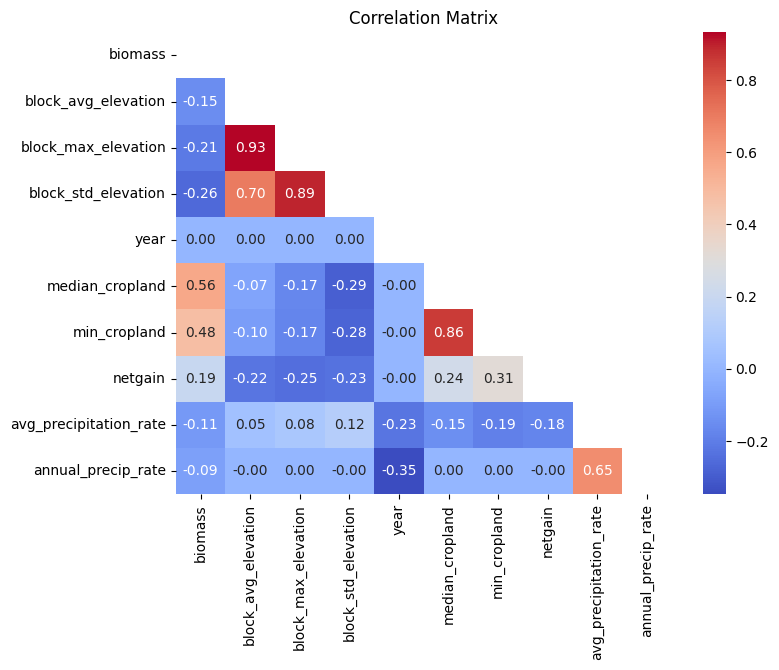

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

biomass_long.insert(0, 'biomass', biomass_long.pop('biomass'))
# Calculate the correlation matrix
corr_matrix = biomass_long.query("year > 2010").select_dtypes(include='number').drop(columns=['index', 'lat', 'lon']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix')

plt.show()

O volume de chuva dos anos anteriores não parece ter influência significativa na predição de biomassa, por esse motivo não será utilizada no treinamento do modelo.

## **Treinamento e validação** 

In [ ]:
from modelling import training
import importlib
importlib.reload(training)


In [228]:
full_data = training.add_features(biomass)

Finished: 100%|██████████| 4/4 [00:11<00:00,  2.86s/it]                 


In [2]:
def tseries_train_test_split(X: pd.DataFrame, y: pd.Series, forecast_year=2017, start_year=None):
    """
    Split the data into training and testing sets based on the forecast year

    Args:
    X (pd.DataFrame): The features
    y (pd.Series): The target
    forecast_year (int): The year to forecast

    Returns:
    X_train (pd.DataFrame): The training features
    y_train (pd.Series): The training target
    X_test (pd.DataFrame): The testing features
    y_test (pd.Series): The testing target

    """
    train_condition = f'year < {forecast_year}' + (f' and year >= {start_year}' if start_year else '')
    test_condition = f'year == {forecast_year}'

    X_train = X.loc[X.query(train_condition).index]
    y_train = y.loc[X_train.index]
    X_test = X.loc[X.query(test_condition).index]
    y_test = y.loc[X_test.index]

    X_train = X_train.drop(columns=['year'])
    X_test = X_test.drop(columns=['year'])

    return X_train, y_train, X_test, y_test

def preprocess_data(data):
    data = data.copy()
    X = data.drop(columns=['biomass', 'index', 'lat', 'lon'])
    y = data['biomass']
                           
    return X, y

In [268]:
# data split on the biomass (time-series)
X, y = preprocess_data(full_data.copy())
X_train, y_train, X_test, y_test = tseries_train_test_split(X, y)

# define the preprocessing steps for numerical and categorical features
numeric_features = X_train.select_dtypes(include=[float, int]).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

Para efetuar a validação cruzada irei utilizar o método de divisão com janela expansiva, como ilustrado abaixo:

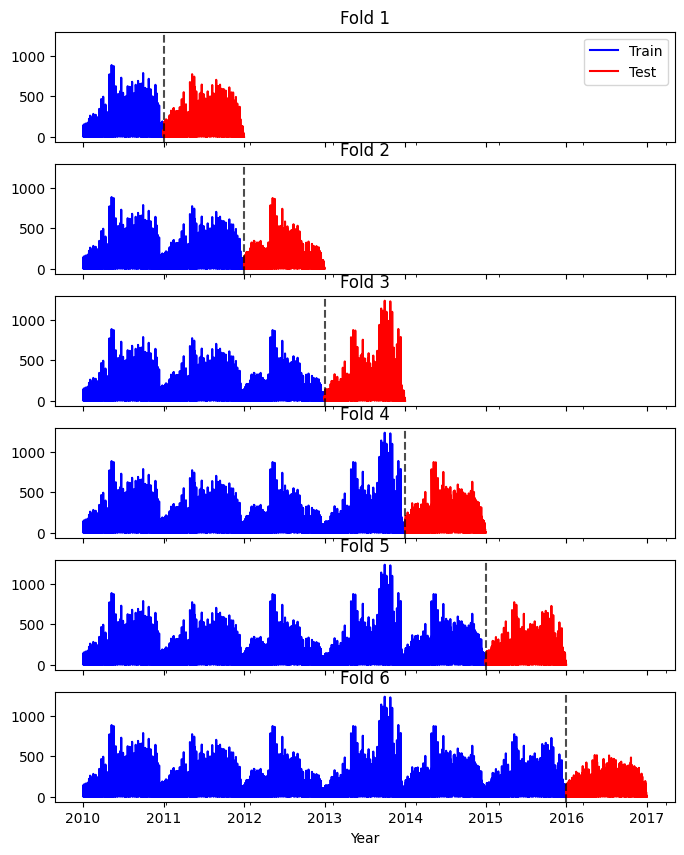

In [269]:
years = np.unique(full_data['year'])[2:]
n_folds = 6

fig, axs = plt.subplots(n_folds, 1, figsize=(8, 10),
                        sharex=True, sharey=True)

tscv = training.TimeSeriesSplit(window_size=1, sliding_windows=False)

for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
    train, test = full_data.iloc[train_index], full_data.iloc[test_index]

    train['biomass'].plot(ax=axs[i], color='blue', label='Train')
    test['biomass'].plot(ax=axs[i], color='red', label='Test')
    axs[i].set_title(f'Fold {i+1}')
    axs[i].axvline(test.index.min(), color='black', linestyle='--', alpha=0.7)
    
axs[-1].set_xticks([full_data.query(f'year == {year}').index[0] for year in range(2010, 2018)], range(2010, 2018))
axs[-1].set_xlabel('Year')
axs[0].legend()
plt.show()

In [270]:
import importlib
from modelling import training, tuning
importlib.reload(training)
importlib.reload(tuning)
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Seleção do modelo

Para fazer a seleção de modelos, criei modelos inicias com parâmetros adequados ao caso atual. O modelo de regressão linear é o nosso **baseline**, pois é o modelo mais simples. Em relação aos outros:

- **RandomForest** é um modelo que visa minimizar a variância das árvores criadas performando uma votação entre elas, esse foco faz com que seu principal déficit seja o bias, ou seja, o erro do estimador em relação ao valor real, causando underfitting.
- Já o **XGBoost** é um modelo de Gradient Boosting, que visa minimizar o bias por meio de árvores sequenciais. Por isso, seu principal problema é o potencial de uma variância elevada, causando overfitting.
- O **Extra Trees** é muito similar ao modelo Random Forest e tem as mesmas consequências, com a diferença de que existe um maior foco

In [12]:
algorithms = {
    'lr': LinearRegression(),
    'rf': RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=10, criterion='absolute_error',n_jobs=-1),
    'xgb': XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=8, min_samples_split=10, objective='reg:absoluteerror', n_jobs=-1),
    'xtra': ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=10, criterion='absolute_error', n_jobs=-1)
}

In [41]:
results = training.model_selection_workflow(X_train, y_train, algorithms)

[0] Running "lr" algorithm...
	[i] Cross validating...
	Gathering results...
[1] Running "rf" algorithm...
	[i] Cross validating...
	Gathering results...
[2] Running "xgb" algorithm...
	[i] Cross validating...
	Gathering results...
[3] Running "xtra" algorithm...
	[i] Cross validating...
	Gathering results...


In [44]:
results

algorithm  train_rmse  train_mae  test_rmse   test_mae   fit_time
2       xgb   50.823810  24.060746  75.655728  41.212786   9.076717
3      xtra   51.997988  25.869390  76.240788  41.947422  64.568823
1        rf   51.931028  28.147056  76.003245  42.495819  60.486365
0        lr   84.487748  57.561461  96.074970  65.104227   0.054302

O algoritmo que melhor performou no processo foi o **XGBoost**.

## **Hyper-parameter tuning**

In [9]:

from sklearn.model_selection import GridSearchCV

pipe_xgb = training.get_pipeline(XGBRegressor(n_jobs=-1), X_train)


xgb_param_grid = {
    'regressor__n_estimators': [800, 1000, 1100, 1200],
    'regressor__max_depth': [5, 8, 10],
    'regressor__learning_rate': [0.03, 0.05],
    'regressor__gamma': [0, 3, 5]
}

grid_search = GridSearchCV(pipe_xgb, xgb_param_grid, cv=tscv, 
                           scoring='neg_mean_absolute_error', 
                           return_train_score=True, 
                           refit=True,  n_jobs=-1)

In [10]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=<modelling.training.TimeSeriesSplit object at 0x000001ACECCF7A50>,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['block_max_elevation',
                                                                          'block_std_elevation',
                                                                          'min_cropland',
                                                                          'median_cropland',
                                                                          'netgain',
                                                                          'block_avg_elevation']),
                                                                        ('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown...
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__gamma': [0, 3, 5],
                         'regressor__learning_rate': [0.03, 0.05],
                         'regressor__max_depth': [5, 8, 10],
                         'regressor__n_estimators': [800, 1000, 1100, 1200]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [11]:
results = grid_search.cv_results_
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('mean_test_score', ascending=False)
results_df[['mean_test_score', 'mean_train_score','std_test_score', 'params']].head(5)

mean_test_score  mean_train_score  std_test_score  \
9        -39.971859        -22.301200       10.749428   
10       -39.972906        -22.271263       10.746748   
11       -39.974697        -22.250365       10.745150   
19       -39.975734        -22.272920       10.746280   
20       -39.976301        -22.235420       10.743666   

                                               params  
9   {'regressor__gamma': 0, 'regressor__learning_r...  
10  {'regressor__gamma': 0, 'regressor__learning_r...  
11  {'regressor__gamma': 0, 'regressor__learning_r...  
19  {'regressor__gamma': 0, 'regressor__learning_r...  
20  {'regressor__gamma': 0, 'regressor__learning_r...

In [12]:
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:")
print(f"MAE = {round(-grid_search.best_score_, 4)}")
best_params

Melhores parâmetros encontrados:
MAE = 39.9719


{'regressor__gamma': 0,
 'regressor__learning_rate': 0.03,
 'regressor__max_depth': 10,
 'regressor__n_estimators': 1000}

In [13]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['block_max_elevation',
                                                   'block_std_elevation',
                                                   'min_cropland',
                                                   'median_cropland', 'netgain',
                                                   'block_avg_elevation']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['distname'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('regressor',
                 XGB...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=-1,
                              num_parallel_tree=None, random_state=None, ...))])

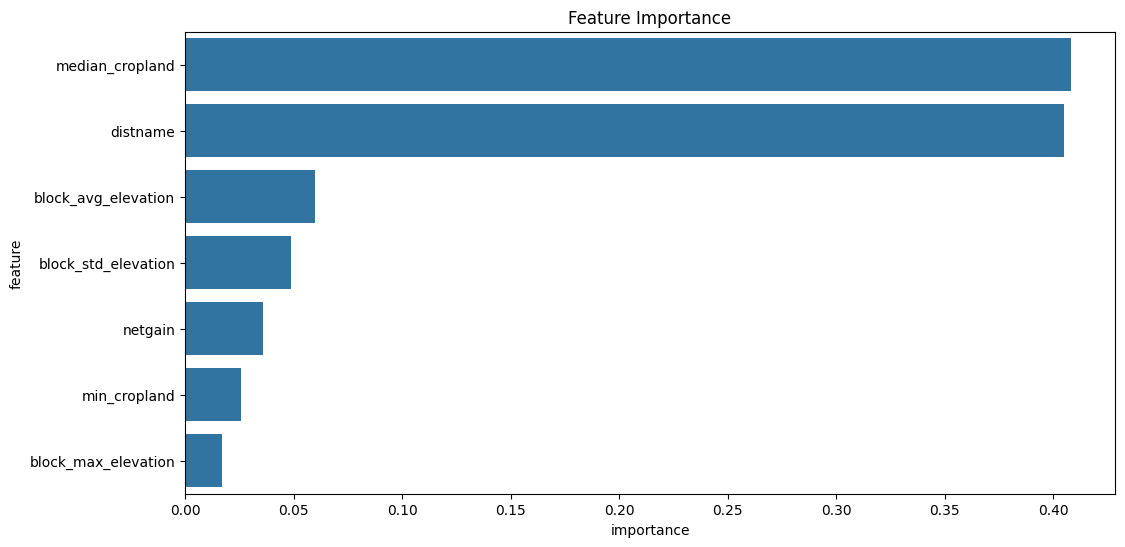

In [16]:
from modelling import plotting
plotting.plot_feature_importance(best_model.named_steps['regressor'], X_train)

In [19]:
# save model
joblib.dump(best_model, 'models/xgb_best.pkl')

['models/xgb_best.pkl']

## **Resultados**

In [24]:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Performance no conjunto de dados não visto:")
print(f"MAE = {round(mae, 4)}")

Performance no conjunto de dados não visto:
MAE = 38.407


In [25]:
pd.DataFrame({'True': y_test, 'Predicted': y_pred, 'Error': abs(y_test - y_pred), 'Error (%)': abs((y_test - y_pred) / y_test)})

True  Predicted      Error  Error (%)
16926    5.180296   8.186129   3.005832   0.580243
16927   42.126945  28.934189  13.192757   0.313167
16928   73.203232  56.298302  16.904930   0.230931
16929  101.067352  74.587997  26.479355   0.261997
16930   26.086885  18.461576   7.625309   0.292304
...           ...        ...        ...        ...
19339    5.321604   4.872072   0.449532   0.084473
19340    0.120626   0.379278   0.258652   2.144249
19341    0.038879   0.083016   0.044136   1.135215
19342    1.304297   1.533250   0.228953   0.175537
19343    0.226953   0.280334   0.053381   0.235208

[2418 rows x 4 columns]

O modelo parece ter dificuldade de prever valores de biomassa altos

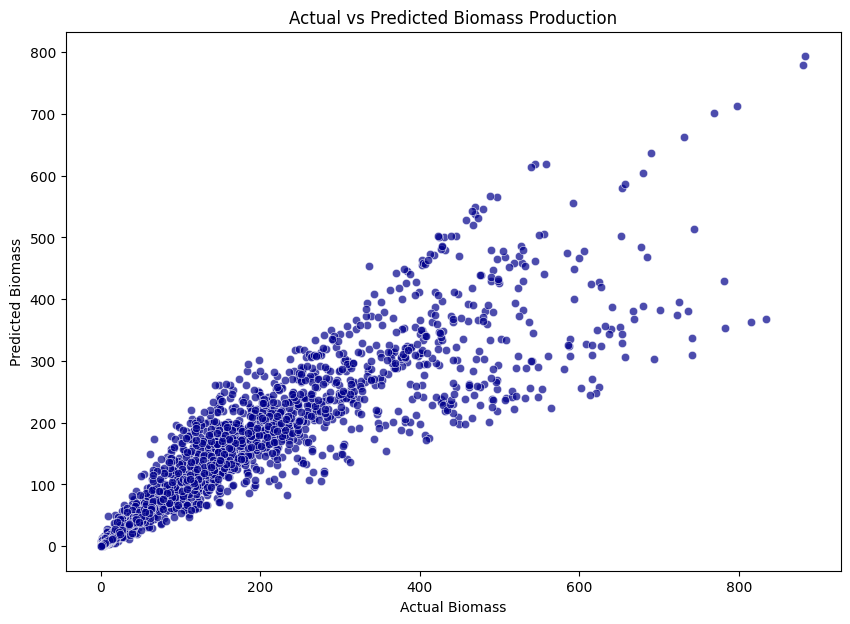

In [50]:
# plot the real vs predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=best_model.predict(X_test), alpha=0.7, color='darkblue')
plt.xlabel('Actual Biomass')
plt.ylabel('Predicted Biomass')
plt.title('Actual vs Predicted Biomass Production')
plt.show()

Para valores de biomassa altos o modelo tende a performar pior do que para valores de biomassa menores. Ou seja, o erro tem correlação com o valor de biomassa.

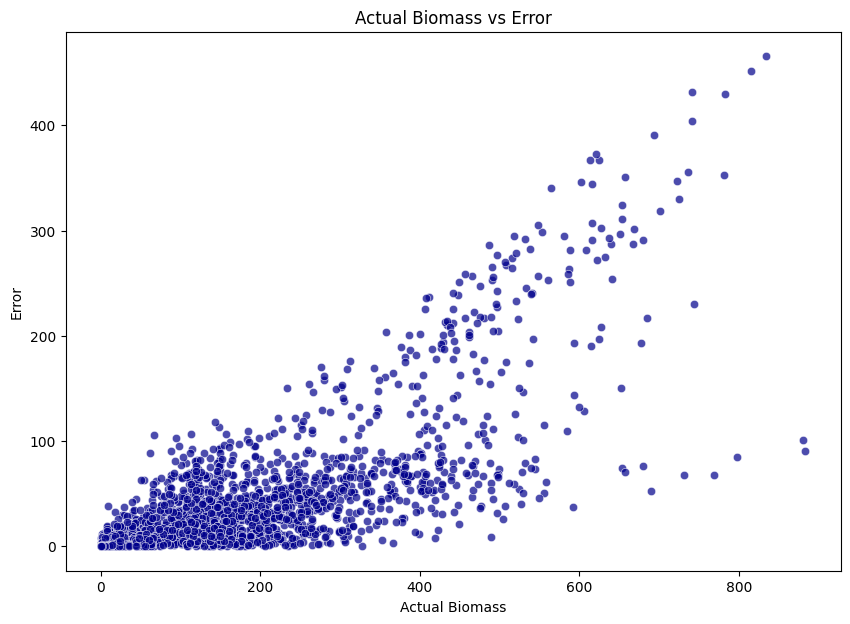

In [51]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=abs(y_test - best_model.predict(X_test)), alpha=0.7, color='darkblue')
plt.xlabel('Actual Biomass')
plt.ylabel('Error')
plt.title('Actual Biomass vs Error')
plt.show()

## Forecasting

In [3]:
# actual values
actual = pd.read_csv('dataset/Biomass_private_databasea91704d.csv')
utils.standardize_column_names(actual)
actual = actual.rename(columns={'latitude': 'lat', 'longitude': 'lon'})
actual

index       lat       lon       2018       2019
0         0  24.66818  71.33144   7.119092  10.704760
1         1  24.66818  71.41106  45.937351  26.978222
2         2  24.66818  71.49069  75.666054  56.543396
3         3  24.66818  71.57031  94.867676  65.010101
4         4  24.66818  71.64994  18.417318  24.765160
...     ...       ...       ...        ...        ...
2413   2413  20.15456  72.84432   4.404175   4.952701
2414   2414  20.15456  72.92394   0.097374   0.110346
2415   2415  20.15456  73.00357   0.031385   0.035566
2416   2416  20.15456  73.08319   1.052878   1.193149
2417   2417  20.15456  73.16282   0.183205   0.207613

[2418 rows x 5 columns]

In [ ]:
actual_long = training.add_features(actual, offset=0.05, years=[2018, 2019])
new_full_data = pd.concat([full_data, actual_long], ignore_index=True)
new_full_data.to_csv('models/full_data.csv', index=False)

In [3]:
full_data = pd.read_csv('models/full_data.csv')

# data split on the biomass (time-series)
X_new, y_new = preprocess_data(full_data)

X_train_2018, y_train_2018, X_forecast_2018, y_actual_2018 = tseries_train_test_split(X_new, y_new, forecast_year=2018, start_year=2012)
X_train_2019, y_train_2019, X_forecast_2019, y_actual_2019 = tseries_train_test_split(X_new, y_new, forecast_year=2019, start_year=2013)

In [4]:
# load model
model = joblib.load('models/xgb_best.pkl')

biomass_18_19 = pd.read_csv('dataset/Biomass_private_databasea91704d.csv')

# load biomass data
full_biomass = pd.concat([biomass, biomass_18_19], axis=1)

# load distance matrix
dist_matrix = pd.read_csv('dataset/distance_matrix.csv', index_col=0)
dist_matrix = dist_matrix.to_numpy()

In [ ]:
from optimization.cost_functions import *

In [193]:

model.fit(X_train_2018, y_train_2018)
y_forecast_2018 = model.predict(X_forecast_2018)

model.fit(X_train_2019, y_train_2019)
y_forecast_2019 = model.predict(X_forecast_2019)

fcost_2018 = cost_of_forecast(y_actual_2018, y_forecast_2018)
fcost2019 = cost_of_forecast(y_actual_2019, y_forecast_2019)

print(f"Cost of forecast 2018: {fcost_2018}")
print(f"Cost of forecast 2019: {fcost2019}")

Cost of forecast 2018: 32.04735166366188
Cost of forecast 2019: 36.85054841572261


## Visão de negócio

O objetivo aqui é prever o valor de biomassa para os anos 2018 e 2019 e utilizar disso para posicionar depósitos de biomassa em lugares estratégicos. 

Sabendo que existe o custo de transporte, de subutilização do depósito e custo do erro da previsão, é possível observar que a otimização é uma etapa importante quando se pensa em propósito prático para o projeto.

O custo de transporte é descrito pela fórmula abaixo:

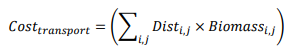

onde $Dist_{i,j}$ é o custo (ou distância) de transportar do ponto **i** até o ponto **j** e $Biomass_{i,j}$ é a quantidade de biomassa produzida no local de colheita **i** e que esteja ligada a um depósito **j** .
o custo de subutilização do depósito é descrito pela fórmula abaixo:

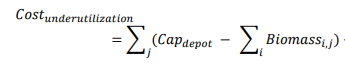

onde $\text{Cap}_{\text{depot}}=20 000$ representa o limite de processamento anual de biomassa e $Biomass_{i,j}$ é o valor de biomassa transportado do local de colheita **i** até o depósito **j**.
O custo total é

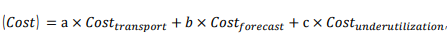

onde $\text{Cost}_{\text{forecast}}$ é o **Mean Absolute Error (MAE)** que utilizamos como métrica principal anteriormente.

## Otimização

In [ ]:
from optimization.optimization import SimulatedAnnealing, best_depot_locations, assign_sites_to_depots

Uma solução gulosa seria selecionar locais que estão mais perto das maiores produções de biomassa e para cada depósito selecionar os locais de colheita com menor custo. Porém isso leva a uma solução bem distante da ótima.

In [235]:
# Example usage
def naive_solution(dist_matrix, y_forecast):
    depot_locations = best_depot_locations(dist_matrix, y_forecast, 15)
    return assign_sites_to_depots(depot_locations, dist_matrix, y_forecast)

greedy_cost_2019 = total_cost(dist_matrix, y_actual_2019, y_forecast_2019, naive_solution(dist_matrix, y_forecast_2019))
greedy_cost_2018 = total_cost(dist_matrix, y_actual_2018, y_forecast_2018, naive_solution(dist_matrix, y_forecast_2019))

print(f"Greedy cost 2018: {greedy_cost_2018:.2f}")
print(f"Greedy cost 2019: {greedy_cost_2019:.2f}")


Greedy cost 2018: 51879.16
Greedy cost 2019: 50872.53


- Para otimizar de um jeito mais inteligente, vou utilizar o algoritmo [Simulated Annealing](https://en.wikipedia.org/wiki/Simulated_annealing), que consiste em varrer o espaço de soluções de uma forma probabilística com o objetivo de escapar de ótimos locais.

- Na minha solução, adaptei o algoritmo para utilizar de um conceito de outro algoritmo, o [Variable Neighborhood Search](https://en.wikipedia.org/wiki/Variable_neighborhood_search), que utiliza uma variável `k` para controlar o nível de perturbação aplicado a solução na busca. 

- Na minha versão, a perturbação é realizada de duas formas:
    1. Permutando conexões entre locais de colheita e depósitos.
    2. Removendo depósitos e adicionando em lugares aleatórios. As probabilidades de escolha dos novos locais seguem uma distribuição normal "2D" ou multivariada, com a média determinada pelas coordenadas médias dos locais já escolhidos. Ou seja, quanto mais longe das posições já escolhidas menor a probabilidade em média.

In [250]:
# Example usage
initial_temp = 1000
cooling_rate = 0.99
max_iterations = 10_000

sa = SimulatedAnnealing(initial_temp, cooling_rate, max_iterations)
best_solution, best_cost = sa.fit(dist_matrix, y_forecast_2019, y_actual_2019)


Initial Solution Cost:
 38607.41174562435
Iteration: 0, Temperature: 990.000000, Current Cost: 38607.41174562435, Best Cost: 38607.41174562435, k: 0.5
New Best Solution Found! Cost: 38607.18612896668
New Best Solution Found! Cost: 38606.94916441891
New Best Solution Found! Cost: 38605.6459568265
New Best Solution Found! Cost: 38363.43979078206
Iteration: 100, Temperature: 362.372018, Current Cost: 42133.42510758508, Best Cost: 38363.43979078206, k: 7.0
Iteration: 200, Temperature: 132.639878, Current Cost: 40631.76576122579, Best Cost: 38363.43979078206, k: 14.0
New Best Solution Found! Cost: 38098.35463336739
New Best Solution Found! Cost: 38098.284473091924
New Best Solution Found! Cost: 37784.921090208416
New Best Solution Found! Cost: 37329.11752291848
New Best Solution Found! Cost: 37327.73823651036
Iteration: 300, Temperature: 48.550485, Current Cost: 37327.73823651036, Best Cost: 37327.73823651036, k: 0
New Best Solution Found! Cost: 37327.535127049756
New Best Solution Found! C

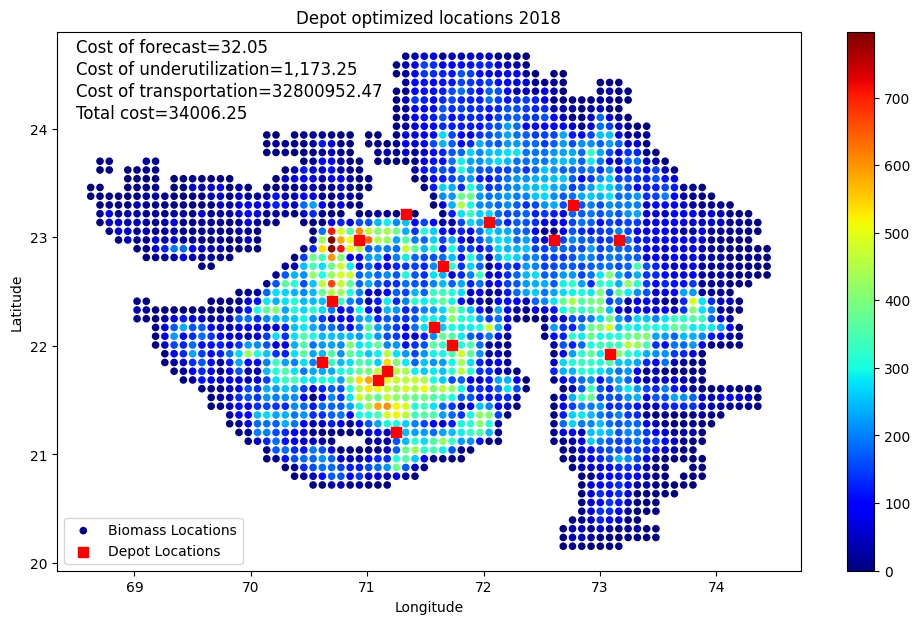

In [251]:
def plot_depot_connections(full_biomass, depot_locations, adj_matrix, y_forecast, y_actual, title='Depot optimized locations'):
    """
    Plots the connections of a specified depot and displays the utilization of each depot.

    Parameters:
    - full_biomass (pd.DataFrame): DataFrame containing 'lon' and 'lat' columns for locations.
    - possible_locations (list or array-like): Indices of possible locations.
    - depot_locations (list or array-like): Indices of depot locations.
    - adj_matrix (np.ndarray): Adjacency matrix indicating connections between locations.
    - y_forecast_2018 (np.ndarray): Forecast data for utilization calculation.
    - depot_index (int): Index of the depot to plot connections for (default is 0).

    Returns:
    - None
    """
    plt.figure(figsize=(12, 7))

    # Plot possible locations in black
    #plt.scatter(full_biomass['lon'].iloc[possible_locations], full_biomass['lat'].iloc[possible_locations], c='black', s=30, label='Possible Locations')

    # Plot all biomass locations in blue
    plt.scatter(full_biomass['lon'], full_biomass['lat'], c=y_forecast, cmap='jet', s=20, label='Biomass Locations')
    # plot the map with colormap of the biomass
    plt.colorbar()


    #conns = 0
    # Plot connections from specified depot
    #for connection in np.where(adj_matrix[:, depot_locations[depot_index]] > 0 )[0]:
    #    plt.plot([full_biomass['lon'].iloc[depot_locations[depot_index]], full_biomass['lon'].iloc[connection]], 
    #             [full_biomass['lat'].iloc[depot_locations[depot_index]], full_biomass['lat'].iloc[connection]], 
    #             color='black', alpha=0.4)
    #    conns += 1
        
    #print(f"Connections from depot {depot_index}: {conns}")

    # Plot depot locations in red
    plt.scatter(full_biomass['lon'].iloc[depot_locations], full_biomass['lat'].iloc[depot_locations], c='red', s=60, label='Depot Locations', marker='s')


    # Write the depot % utilization of every depot
    plt.text(68.5, 24.7, f"Cost of forecast={cost_of_forecast(y_actual, y_forecast):.2f}", fontsize=12)
    plt.text(68.5, 24.5, f"Cost of underutilization={cost_of_underutilization(adj_matrix, y_forecast):,.2f}", fontsize=12)
    plt.text(68.5, 24.3, f"Cost of transportation={cost_of_transportation(dist_matrix, y_forecast, adj_matrix):.2f}", fontsize=12)
    plt.text(68.5, 24.1, f"Total cost={total_cost(dist_matrix, y_actual, y_forecast, adj_matrix):.2f}", fontsize=12)

    #print a list of all depots biomass capacity
    # Improve plot aesthetics
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(loc='lower left')

    plt.show()

# Example usage (assuming the required data is already defined):
plot_depot_connections(full_biomass, depot_locations = best_solution[1], adj_matrix=best_solution[0], y_forecast=y_forecast_2018, y_actual=y_actual_2018, title='Depot optimized locations 2018')

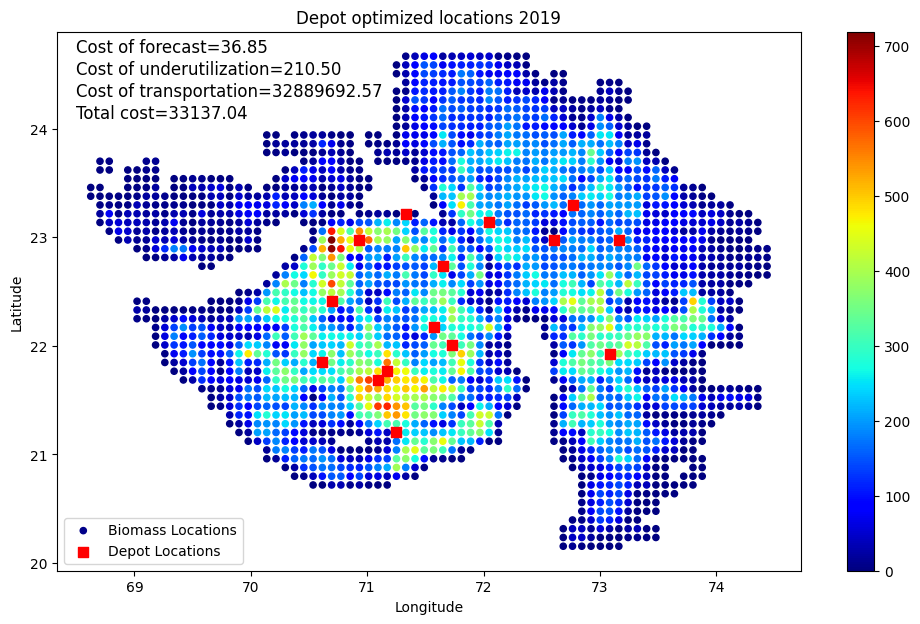

In [253]:
plot_depot_connections(full_biomass, depot_locations = best_solution[1], adj_matrix=best_solution[0], y_forecast=y_forecast_2019, y_actual=y_actual_2019, title='Depot optimized locations 2019')

É possível observar que o custo pode aumentar consideravelmente se a escolha do depósito não for inteligente.

In [254]:
best_cost_2018 = total_cost(dist_matrix, y_actual_2018, y_forecast_2018, best_solution[0])
best_cost_2019 = total_cost(dist_matrix, y_actual_2019, y_forecast_2019, best_solution[0])

print(f"Com essa otimização, o custo total de 2018 caiu de {greedy_cost_2018:.2f} para {best_cost_2018:.2f}, uma redução de {(greedy_cost_2018 - best_cost_2018) / greedy_cost_2018:.2%}")
print(f"Com essa otimização, o custo total de 2019 caiu de {greedy_cost_2019:.2f} para {best_cost_2019:.2f}, uma redução de {(greedy_cost_2019 - best_cost_2019) / greedy_cost_2019:.2%}")

Com essa otimização, o custo total de 2018 caiu de 51879.16 para 34006.25, uma redução de 34.45%
Com essa otimização, o custo total de 2019 caiu de 50872.53 para 33137.04, uma redução de 34.86%
